#### Capstone Project - The Battle of Neighborhoods ####

# Open up a Filipino Restaurant in the City of Toronto #

### By Ahmad Fadlan Awriya ###
A final report for the course "[Applied Data Science Capstone](https://www.coursera.org/learn/applied-data-science-capstone/)" given by IBM on Coursera


#### TL:DR ####
In this project, I define a business problem, search and clean data gathered from various sources, and use Foursquare location data to compare different<br> 
neighbourhoods in Toronto to figureout which neighbourhood is suitable for starting a new restaurant business. I go through all the process in a<br> 
step by step manner from plem designing, data preparation to final analysis and lastly, provide a conclusion that can be leveraged by the<br>
business stakeholders to make their decisions.


## 1. Problem's Description ##

### Prospects of a opening an Filipino Restaurant in Toronto, Canada. ###
Toronto is the capital city of the Canadian province of Ontario. With a recorded population of 2,731,571 in 2016, it is the most populous city in Canada and the fourth most populous city in North America.<br>
The diverse population of Toronto reflects its current and historical role as an important destination for immigrants to Canada. More than 50 percent of residents belong to a visible minority<br>
population group, and over 200 distinct ethnic origins are represented among its inhabitants. While the majority of Torontonians speak English as their primary language,<br>
over 160 languages are spoken in the city.

Looking to the diversity that Toronto has, I forecast in the next few years there will be more and more Filipino Immigrant that comes to Toronto and try to open up an Filipino Restaurant.<br>
As a new Torontonians (People of Toronto), it will be hard for them to know which place is promising to open up a new Filipino Restaurant, and which one is not that good. If we have some<br>
knowledge about the niche market (target customer) and which neighbourhoods will we open up the restaurant, it definitely will make the restaurant more profitable. Since we already know<br>
that Toronto holds more than 50 percent resident from visible minority, it is a good idea to start the restaurant here, but we just need to make sure whether it is a profitable<br>
idea or not. If so, where we can place it, so it yields more profit to the owner.


### Target Audience ###
Who will be more interested in this project? What type of clients or a group of people would be benefitted?
<ol>
    <li>Business personel who wants to invest or open an Indonesian restaurant in Toronto. This analysis will be a comprehensive guide to start or expand restaurants<br>
        targeting the Filipino as well as South-East Asian crowd.</li>
    <li>Freelancer who loves to have their own restaurant as a side business. This analysis will give an idea, how beneficial it is to open a restaurant and what are<br>
        the pros and cons of this business.</li>
    <li>Filipino crowd who wants to find neighborhoods with lots of option for Filipino / South-East Asian restaurants.</li>
    <li>Business Analyst or Data Scientists, who wish to analyze the neighborhoods of Toronto using Exploratory Data Analysis and other statistical and machine learning<br>
        techniques to obtain all the necessary data,
        perform some operations on it and, finally be able to tell a story out of it.</li>
    </ol>
    

### Business Questions ###
By using Data Science and some geometric factors about the relation between neighbourhoods in Toronto, we can give good answers of following questions<br>
to the investors so that they can have a better vision about not only the restaurant but also about other venues in Toronto.
<ol>
    <li>How many venues in each neighbourhood? Answering this question gives us a better understanding about the dynamic level of a neighbourhood.</li>
    <li>How many categories in each neighbourhood? Answering this question helps us know about the diversity in business of a neighbourhood.</li>
    <li>How many venues in each category? This question shows the magnitude of a category in a district.</li>
    <li>What are the most popular categories in each district? If investors change their mind to focus on other commercial fields instead of opening a restaurant.</li>
    <li>Visualize all information on the map so that we can have a better look on what we want to find the answers!</li>
    </ol>
    
    
### Data Presentation ###
<ol>
    <li>List of Canada Postal Code from Wikipedia. (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) wiki page to get all the information about<br>
        the neighborhoods present in Toronto. This page has the postal code, borough and the name of all the neighborhoods present in Toronto.</li>
    <li>List of coordinates (latitude, longitude) gather from “https://cocl.us/Geospatial_data” csv file to get all the geographical coordinates of the neighborhoods.<br>
        The list can also be obtain by using package <i>geopy.geocoders.Nominatim.</i>.</li>
    <li>Information regarding to the distribution of population by their ethnicity gathered from “Demographics of Toronto” (https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity)<br>
        wiki page. Using this page I’m going to identify the neighborhoods which are densely populated with Filipino as it might be helpful in identifying the suitable neighborhood to open a new Filipino restaurant.</li>
    <li>Information on location and other information about various venues in Toronto by using Foursquare’s explore API. Using the Foursquare’s explore API (which gives venues recommendations),<br>
        I’m fetching details about the venues up present in Toronto and collected their names, categories and locations (latitude and longitude). From Foursquare API (https://developer.foursquare.com/docs), I retrieved the following for each venue:</li>
    </ol>
    <ul>
    <li> Name: The name of the venue</li>
    <li> Category: The category type as defined by the API</li>
    <li> Latitude: The latitude value of the venue</li>
    <li> Longitude: The longitude value of the venue</li>
    </ul>

### Methodology ###
<ol>
    <li>First, we need to collect the data by scraping the table of Toronto's postal code on the wikipedia page and the information regarding to the distribution of population by ethnicity also gathered from wikipedia page. The BeautifulSoup package is very useful for extracting postal code table from wikipedia. Wikipedia libraries will be directly install to Jupyter Notebook for the sake of simplicity.</li>
    <li>Throughout the project, we use numpy and pandas packages to manipulate dataframes.</li>
    <li>We use geopy.geocoders.Nominatim to get the coordinates of districts and add them to the main data frame.</li>
    <li>We use folium package to visualize the Toronto map with its districts. The central coordinate of each district will be represented as a small circle on top of the city map.</li>
    <li>We use Foursquare API to explore the venues in each district and segment the districts based on them.</li>
    <li>For clustering the restaurant venues between districts, we use K-Means Clustering method and the package scikit-learn will help us implement the algorithm on our data.<br>
        In order to indicate how many K for the method, I use the elbow method to choose the most appropriate one.</li>
    <li>In order to visualize the charts, we use pakage matplotlib.</li>
    </ol>

## 2. Data Cleaning ##
### 2.1 Scraping Toronto Neighbourhoods Table From Wikipedia ###


#### Scraping Toronto Neighborhoods Table from Wikipedia ####
Assumptions made to attain the below dataframe:
<ul>
    <li> Dataframe will consist of three columns: PostalCode, Borough, and Neighborhood. </li>
    <li> Only the cells that have an assigned borough will be processed. Borough that is not assigned are ignored. </li>
    <li> Based on the Wikipedia table, More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page,<br>
        you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row<br>
        with the neighborhoods separated with a comma as shown in row 11 in the above table. </li>
    <li> If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. </li>
    </ul>
    
I'm going to use <i>Wikipedia</i> package to scrape the Toronto Postal Code table and to scrape the ethnicity data.

In [4]:
# import libraries that I will use for scraping data

import pandas as pd
import numpy as np

!pip install wikipedia

import wikipedia as wp
import requests
from bs4 import BeautifulSoup

html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")
df = pd.read_html(html, header = 0)[0]
df.head()

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11685 sha256=ea3380ba2d2d915b3d1e61c78017cade1aef6654c57a180f63ac52109d78b2b8
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [5]:
#Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
df = df[df.Borough != 'Not assigned']
df = df.rename(columns={'Postal Code': 'PostalCode'})

#If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. 
#So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']


df.head()

,PostalCode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [6]:
df = df.groupby(['Borough', 'PostalCode'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()
df.head()

,Borough,PostalCode,Neighbourhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,"North Toronto West, Lawrence Park"
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"


In [7]:
#By using only one word to assigned Postal Code will help further development for SQL purpose


### 2.2 Get the latitude and the longitude coordinates of each neighbourhood ###
Next important step is adding the geographical coordinates to these neighborhoods. To do so I'm extracting the data present in the Geospatial Data csv file and I'm combining it with the<br>
existing neighborhood dataframe by merging them both based on the postal code.

In [8]:
#Reading the latitude & longitude data from CSV file

import io
import requests

url = "https://cocl.us/Geospatial_data"
lat_long = requests.get(url).text
lat_long_df=pd.read_csv(io.StringIO(lat_long))
lat_long_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [9]:
#Renaming the columns to match the existing dataframe and also by using only one word to assigned Postal Code will help further development for SQL purpose

lat_long_df = lat_long_df.rename(columns={'Postal Code': 'PostalCode'})
lat_long_df.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [10]:
#After that I'm merging both the dataframe into one by matching on the postal code.

toronto_DF = pd.merge(df, lat_long_df, on='PostalCode', how='inner')
toronto_DF.head()

,Borough,PostalCode,Neighbourhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160


In [11]:
toronto_DF = toronto_DF.rename(columns={'Neighbourhood': 'Neighborhood'})
toronto_DF.head()

,Borough,PostalCode,Neighborhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160


### 2.3 Scrap the distribution of population from Wikipedia ###
Another factor that can help us in deciding which neighbourhood would be best option to open a restaurant is, the distribution of population based on the ethnic diversity for each neighborhood. As this helps us in identifying the neighborhoods which are densely populated with Filipino crowd since that neighborhood would be an ideal place to open an Filipino restaurant.

Scraped the following Wikipedia page, “Demographics of Toronto” in order to obtain the data about the Toronto & the Neighborhoods in it. Compared to all the neighborhoods in Toronto below given neighborhoods only had considerable amount of Filipino crowd. We are examing those neighborhood's population to identify the densely populated neighborhoods with Filipino population.

In [12]:
#Overall population distribution 

html = wp.page("Demographics of Toronto").html().encode("UTF-8")

#### North York Population Distribution by Ethnicity ####

In [13]:
#NORTH YORK population distribution by ethnicity

North_population_df = pd.read_html(html, header = 0)[13]
North_population_df = North_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %',
                                                     '%.8':'Ethnic Origin 9 in %'})
North_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN


#### Scarborough Population Distribution by Ethnicity ####

In [14]:
#NORTH YORK population distribution by ethnicity 
Scar_population_df = pd.read_html(html, header = 0)[14]
Scar_population_df = Scar_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})
Scar_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
1,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
2,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
4,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN
5,Scarborough North,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### ETOBICOKE & YORK Population Distribution by Ethnicity ####

In [15]:
#ETOBICOKE & YORK population distribution by ethnicity

ETY_population_df = pd.read_html(html, header = 0)[15]
ETY_population_df = ETY_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})
ETY_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Etobicoke-Lakeshore,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.1,Ukrainian,7.6,German,7.1
1,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Etobicoke Centre,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.1,Polish,7.4,NaN,NaN
3,York South-Weston,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### TORONTO & EAST YORK Population Distribution by Ethnicity ####

In [16]:
#TORONTO & EAST YORK population distribution by ethnicity 

TEY_population_df = pd.read_html(html, header = 0)[12]
TEY_population_df = TEY_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})
TEY_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %,Ethnic Origin #9,%.8
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN
5,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,Polish,10.3,German,7.90,Russian,7.7,Italian,7.3,French,7.2
6,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4,NaN,NaN
7,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN,NaN,NaN


### 2.4 Get location data using Foursquare ###
Foursquare API is very usefule online application used my many developers & other application like Uber etc. In this project I have used it to retrieve informtion about the places present<br>
in the neighborhoods of Toronto. The API returns a JSON file and we need to turn that into a data-frame. Here I’ve chosen 100 popular spots for each neighborhood within a radius of 1km.

In [17]:
# Install geopy libraries to convert an address into latitude and longitude values

!pip install geopy
from geopy.geocoders import Nominatim

In [18]:
#Use geopy library to get the latitude and longitude values of Toronto City.

address = 'Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [19]:
# Install Folium libraries to rendering map

!pip3 install folium
import folium

### 2.5 Define Foursquare Credentials and Versions ###
The Credentials will not be shown in respond to the privacy issue.

In [20]:
CLIENT_ID = 'T2MGEET2TYTPTJPUBMPAAUHHMTPTCKYT5RPH0SDKXD3NDJTQ' # your Foursquare ID
CLIENT_SECRET = '2FB05C5RVCAU5GF1XJTCQ2JGOOZ1IQ1WFUQ1P32CKKVB44UJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [21]:
# limit of number of venues returned by Foursquare API
LIMIT = 100

# define radius
radius=1000

#url
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius)
results = requests.get(url).json()

In [22]:
#Function to get the category

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']

    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### 2.6 Using the get_category_type function, we clean up the json and turn it into a pandas dataframe. ###
Before we start, we need to import several libraries that wil help clean up the data.

In [23]:
import json
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Nathan Phillips Square,Plaza,43.652270,-79.383516
2,Japango,Sushi Restaurant,43.655268,-79.385165
3,UNIQLO ユニクロ,Clothing Store,43.655910,-79.380641
4,Poke Guys,Poke Place,43.654895,-79.385052


#### Next, we explore the nearby venues. ####

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
LIMIT = 100

toronto_venues = getNearbyVenues(names=toronto_DF['Neighborhood'],
                                   latitudes=toronto_DF['Latitude'],
                                   longitudes=toronto_DF['Longitude']
                                  )

Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Queen's Park, Ontario Provincial Government
The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Business reply mail Processing Centre, South Central Letter 

In [26]:
#View the return data from Foursquare

toronto_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.728020,-79.388790,Lawrence Park Ravine,43.726963,-79.394382,Park
1,Lawrence Park,43.728020,-79.388790,Zodiac Swim School,43.728532,-79.382860,Swim School
2,Lawrence Park,43.728020,-79.388790,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
3,Davisville North,43.712751,-79.390197,Summerhill Market North,43.715499,-79.392881,Food & Drink Shop
4,Davisville North,43.712751,-79.390197,Sherwood Park,43.716551,-79.387776,Park
5,Davisville North,43.712751,-79.390197,Homeway Restaurant & Brunch,43.712641,-79.391557,Breakfast Spot
6,Davisville North,43.712751,-79.390197,Winners,43.713236,-79.393873,Department Store
7,Davisville North,43.712751,-79.390197,Best Western Roehampton Hotel & Suites,43.708878,-79.390880,Hotel
8,Davisville North,43.712751,-79.390197,Subway,43.708474,-79.390674,Sandwich Place
9,Davisville North,43.712751,-79.390197,900 Mount Pleasant - Residents Gym,43.711671,-79.391767,Gym / Fitness Center


In [27]:
toronto_venues.shape

(2089, 7)

### Results ###

#### The list of unique categories ####
The list of first 50 categories

In [28]:
toronto_venues['Venue Category'].unique()[:50]

array(['Park', 'Swim School', 'Bus Line', 'Food & Drink Shop',
       'Breakfast Spot', 'Department Store', 'Hotel', 'Sandwich Place',
       'Gym / Fitness Center', 'Yoga Studio', 'Salon / Barbershop',
       'Restaurant', 'Spa', 'Mexican Restaurant', 'Clothing Store',
       'Diner', 'Chinese Restaurant', 'Fast Food Restaurant',
       'Coffee Shop', 'Sporting Goods Shop', 'Café', 'Pet Store',
       'Miscellaneous Shop', 'Dessert Shop', 'Indian Restaurant',
       'Pizza Place', 'Seafood Restaurant', 'Sushi Restaurant',
       'Italian Restaurant', 'Thai Restaurant', 'Gym', 'Toy / Game Store',
       'Brewery', 'Greek Restaurant', 'Gas Station', 'Farmers Market',
       'Gourmet Shop', 'Pharmacy', 'Trail', 'Liquor Store', 'Supermarket',
       'American Restaurant', 'Pub', 'Fried Chicken Joint',
       'Vietnamese Restaurant', 'Bank', 'Light Rail Station',
       'Bagel Shop', 'Home Service', 'Garden'], dtype=object)

In [29]:
#Group by Neighborhood and count the data

toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",6,6,6,6,6,6
"Bathurst Manor, Wilson Heights, Downsview North",22,22,22,22,22,22
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
...,...,...,...,...,...,...
"Willowdale, Willowdale West",6,6,6,6,6,6
Woburn,4,4,4,4,4,4
Woodbine Heights,6,6,6,6,6,6


In [30]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 265 uniques categories.


In [31]:
toronto_venues_group = toronto_venues.groupby('Neighborhood').count()

#### The number of categories in each Neighborhood ####

Text(0, 0.5, 'Number of categories')

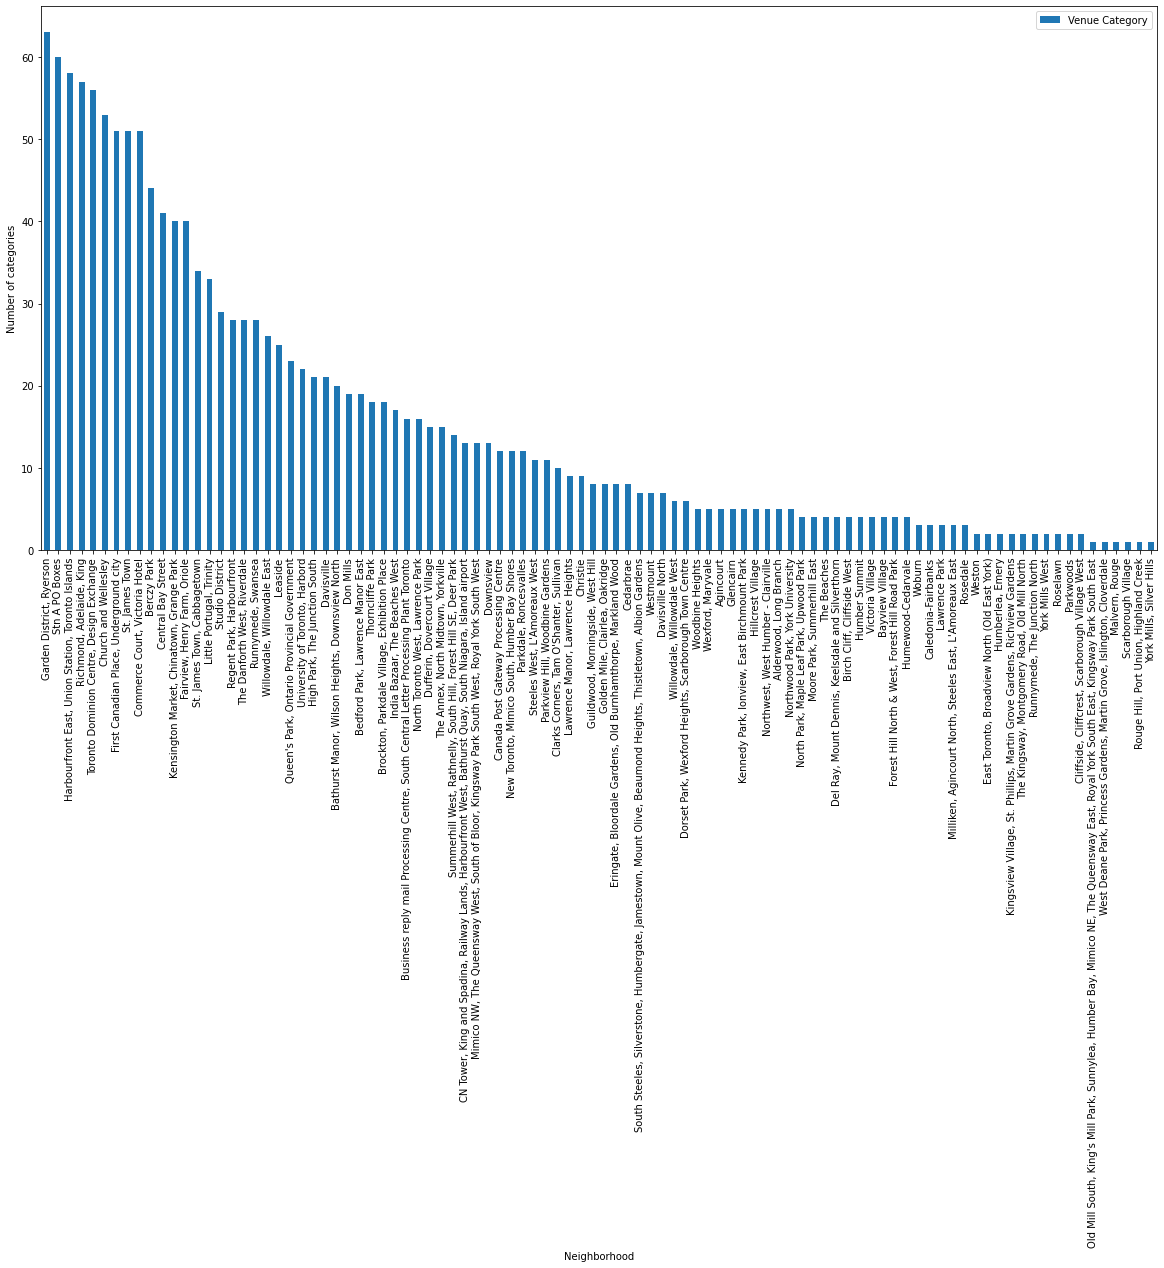

In [32]:
toronto_venues_group_cat = (
    toronto_venues.groupby(['Neighborhood','Venue Category'])
        .count().reset_index()[['Neighborhood', 'Venue Category']]
            .groupby('Neighborhood').count().reset_index()
)
# toronto_venues_group_cat
ax = toronto_venues_group_cat.sort_values(by="Venue Category", ascending=False).plot(x="Neighborhood", y="Venue Category", kind="bar", figsize=(20,10))
ax.set_ylabel("Number of categories")

#### We will do one hot encoding for getting dummies of venue category. So that we will calculate mean of all venue groupby there neighborhoods. ####

In [33]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"Willowdale, Willowdale West",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,York Mills West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
pd.set_option('display.max_columns', None)
toronto_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [35]:
print (toronto_venues['Venue Category'].value_counts())

Coffee Shop      185
Café              93
Restaurant        64
Park              48
Pizza Place       48
                ... 
Skate Park         1
Auto Workshop      1
Climbing Gym       1
Gym Pool           1
Snack Place        1
Name: Venue Category, Length: 265, dtype: int64


#### Top 10 venue categories for each Neighborhood ####

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
toronto_ohv_10 = pd.DataFrame(columns=columns)
toronto_ohv_10['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    toronto_ohv_10.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

toronto_ohv_10

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Lounge,Clothing Store,Skating Rink,Breakfast Spot,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
1,"Alderwood, Long Branch",Pizza Place,Gym,Coffee Shop,Pharmacy,Pub,Dim Sum Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Sushi Restaurant,Gift Shop,Pharmacy,Pizza Place,Mobile Phone Shop,Middle Eastern Restaurant,Restaurant,Deli / Bodega
3,Bayview Village,Japanese Restaurant,Café,Bank,Chinese Restaurant,Women's Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Italian Restaurant,Juice Bar,Sandwich Place,Pizza Place,Restaurant,Cupcake Shop,Pub,Sushi Restaurant,Butcher
...,...,...,...,...,...,...,...,...,...,...,...
91,"Willowdale, Willowdale West",Butcher,Coffee Shop,Grocery Store,Pharmacy,Pizza Place,Discount Store,Diner,Dance Studio,Deli / Bodega,Department Store
92,Woburn,Coffee Shop,Korean BBQ Restaurant,Soccer Field,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant
93,Woodbine Heights,Skating Rink,Bus Stop,Curling Ice,Beer Store,Park,Colombian Restaurant,Comfort Food Restaurant,College Gym,Eastern European Restaurant,Dumpling Restaurant
94,York Mills West,Park,Convenience Store,Women's Store,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run


## 3. Exploratory Data Analysis ##

### 3.1 Folium Library and Leaflet Map ###
Folium is a python library, I'm using it to render an interactive leaflet map using coordinate data

In [37]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_DF['Latitude'], toronto_DF['Longitude'], toronto_DF['Borough'], toronto_DF['Neighborhood']):
    label = '{},{}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### 3.2 Relationship between neighbourhood and Filipino Restaurant ###
First we will extract the Neighborhood and Filipino Restaurant column from the above toronto dataframe for further analysis:

In [38]:
toronto_part = toronto_grouped[['Neighborhood', 'Filipino Restaurant']]
toronto_part

,Neighborhood,Filipino Restaurant
0,Agincourt,0.0
1,"Alderwood, Long Branch",0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0
3,Bayview Village,0.0
4,"Bedford Park, Lawrence Manor East",0.0
...,...,...
91,"Willowdale, Willowdale West",0.0
92,Woburn,0.0
93,Woodbine Heights,0.0
94,York Mills West,0.0


In [39]:
toronto_merged = pd.merge(toronto_DF, toronto_part, on='Neighborhood')
toronto_merged

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Filipino Restaurant
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,0.0
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,0.0
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,0.0
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,0.0
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,0.0
...,...,...,...,...,...,...
95,York,M6C,Humewood-Cedarvale,43.693781,-79.428191,0.0
96,York,M6E,Caledonia-Fairbanks,43.689026,-79.453512,0.0
97,York,M6M,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013,0.0
98,York,M6N,"Runnymede, The Junction North",43.673185,-79.487262,0.0


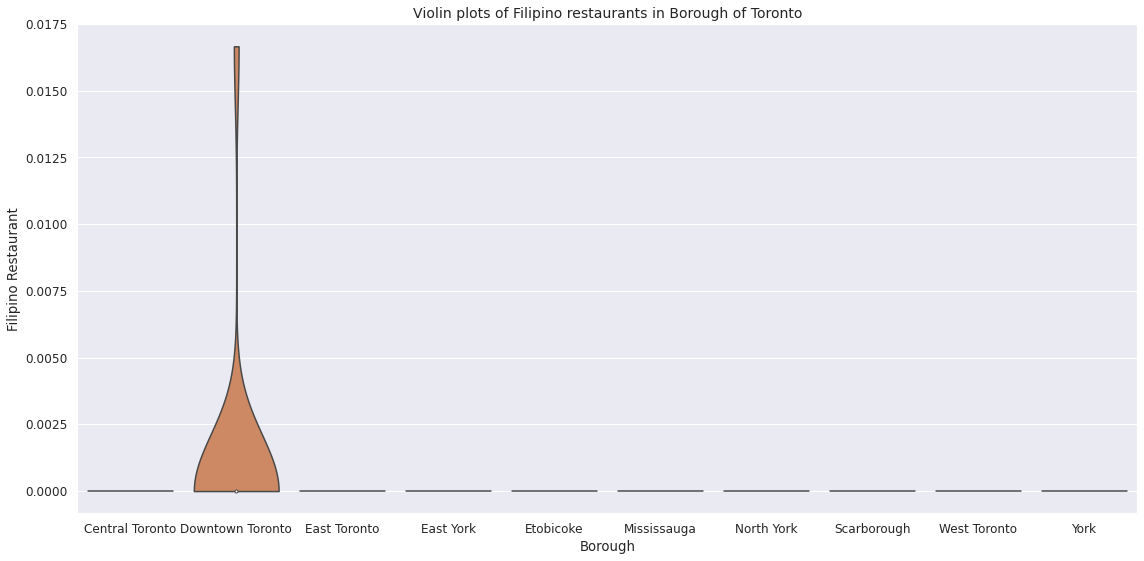

In [40]:
# Let's try Categorical plot 

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(19,9))

sns.set(font_scale=1.1)
sns.violinplot(y="Filipino Restaurant", x="Borough", data=toronto_merged, cut=0);

plt.title('Violin plots of Filipino restaurants in Borough of Toronto', fontsize=14)
plt.show()

This plot helps in identifying the boroughs with densely populated Filipino restaurants.

### 3.3 Lets visualize the neighborhood with Filipino Restaurants ###

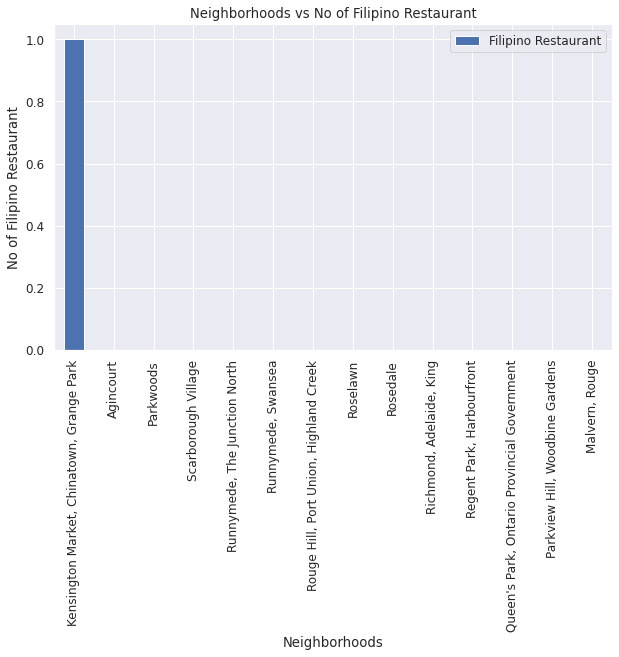

In [41]:
graph = pd.DataFrame(toronto_onehot.groupby('Neighborhood')['Filipino Restaurant'].sum())
graph = graph.sort_values(by ='Filipino Restaurant', ascending=False)
graph.iloc[:14].plot(kind='bar', figsize=(10,6))
plt.xlabel("Neighborhoods")
plt.ylabel("No of Filipino Restaurant")
plt.title("Neighborhoods vs No of Filipino Restaurant")
plt.show()

### 3.4 Relationship between neighborhood and Filipino population ###

In [42]:
#Merge all the population table with the ethnic percentage by neighborhood
ET = ETY_population_df.append(TEY_population_df,sort=True).reset_index()
ET.drop('index',axis=1,inplace=True)
SN = North_population_df.append(Scar_population_df,sort=True).reset_index()
SN.drop('index',axis=1,inplace=True)
pop_ethnic_df = SN.append(ET,sort=True).reset_index()
pop_ethnic_df.drop('index',axis=1,inplace=True)
pop_ethnic_df = pop_ethnic_df[['Riding', 'Population','Ethnic Origin #1', 'Ethnic Origin 1 in %','Ethnic Origin #2', 'Ethnic Origin 2 in %',
                               'Ethnic Origin #3','Ethnic Origin 3 in %','Ethnic Origin #4', 'Ethnic Origin 4 in %','Ethnic Origin #5','Ethnic Origin 5 in %', 
                               'Ethnic Origin #6','Ethnic Origin 6 in %','Ethnic Origin #7', 'Ethnic Origin 7 in %','Ethnic Origin #8', 'Ethnic Origin 8 in %'
                              ]]
pop_ethnic_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.50,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.00,Filipino,7.8,NaN,NaN
7,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.00,NaN,NaN,NaN,NaN
8,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.20,Chinese,7.2,NaN,NaN
9,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### From the above dataframe we can pickout the neighborhoods with highest Filipino population percentage by using the below given method. ####

In [43]:
#Filtering the riding with Indian ethnic crowd
temp = pop_ethnic_df.loc[(pop_ethnic_df['Ethnic Origin #1'] == 'Filipino')| 
                                      (pop_ethnic_df['Ethnic Origin #2'] == 'Filipino')|
                                      (pop_ethnic_df['Ethnic Origin #3'] == 'Filipino')|
                                      (pop_ethnic_df['Ethnic Origin #4'] == 'Filipino')|
                                      (pop_ethnic_df['Ethnic Origin #5'] == 'Filipino')|
                                      (pop_ethnic_df['Ethnic Origin #6'] == 'Filipino')|
                                      (pop_ethnic_df['Ethnic Origin #7'] == 'Filipino')|
                                      (pop_ethnic_df['Ethnic Origin #8'] == 'Filipino')]
pop_filipino_df = pd.DataFrame(temp).reset_index()
pop_filipino_df.drop('index',axis=1,inplace=True)

pop_filipino_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
1,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN
3,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
4,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
5,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
6,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN


In [44]:
#retaining only Indian ethnic percentage & the neighborhood name 

columns_list = pop_filipino_df.columns.to_list()
pop_filipino_DF_with_percent = pd.DataFrame()

#removing Riding & Population from the column names list
del columns_list[0]
del columns_list[0]


for i in range(0,pop_filipino_df.shape[0]):
    for j in columns_list:
        print(j)
        if pop_filipino_df.at[i, j] == 'Filipino':
            k = columns_list.index(j) + 1
            percent_col = columns_list[k]
            pop_filipino_DF_with_percent = pop_filipino_DF_with_percent.append({'Riding':pop_filipino_df.at[i, 'Riding'], 'Population':pop_filipino_df.at[i, 'Population'], 'Ethnicity': pop_filipino_df.at[i, j], 'Percentage': pop_filipino_df.at[i, percent_col]},ignore_index=True)
            
pop_filipino_DF_with_percent

Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origin #3
Ethnic Origin 3 in %
Ethnic Origin #4
Ethnic Origin 4 in %
Ethnic Origin #5
Ethnic Origin 5 in %
Ethnic Origin #6
Ethnic Origin 6 in %
Ethnic Origin #7
Ethnic Origin 7 in %
Ethnic Origin #8
Ethnic Origin 8 in %
Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origin #3
Ethnic Origin 3 in %
Ethnic Origin #4
Ethnic Origin 4 in %
Ethnic Origin #5
Ethnic Origin 5 in %
Ethnic Origin #6
Ethnic Origin 6 in %
Ethnic Origin #7
Ethnic Origin 7 in %
Ethnic Origin #8
Ethnic Origin 8 in %
Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origin #3
Ethnic Origin 3 in %
Ethnic Origin #4
Ethnic Origin 4 in %
Ethnic Origin #5
Ethnic Origin 5 in %
Ethnic Origin #6
Ethnic Origin 6 in %
Ethnic Origin #7
Ethnic Origin 7 in %
Ethnic Origin #8
Ethnic Origin 8 in %
Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origi

,Ethnicity,Percentage,Population,Riding
0,Filipino,11.0,112925.0,Eglinton-Lawrence
1,Filipino,17.0,103760.0,York Centre
2,Filipino,7.8,93170.0,Don Valley East
3,Filipino,13.1,110450.0,Scarborough Centre
4,Filipino,9.5,108295.0,Scarborough Southwest
5,Filipino,9.3,101445.0,Scarborough-Rouge Park
6,Filipino,8.5,101115.0,Scarborough-Guildwood


In [45]:
pop_filipino_DF_with_percent['Filipino Population'] = (pop_filipino_DF_with_percent['Percentage'] * pop_filipino_DF_with_percent['Population'])/100
pop_filipino_DF_with_percent.drop(columns={'Percentage','Population','Ethnicity'},axis=1, inplace =True)
pop_filipino_DF_with_percent.drop_duplicates(keep='first',inplace=True) 
pop_filipino_DF_with_percent

,Riding,Filipino Population
0,Eglinton-Lawrence,12421.750
1,York Centre,17639.200
2,Don Valley East,7267.260
3,Scarborough Centre,14468.950
4,Scarborough Southwest,10288.025
5,Scarborough-Rouge Park,9434.385
6,Scarborough-Guildwood,8594.775


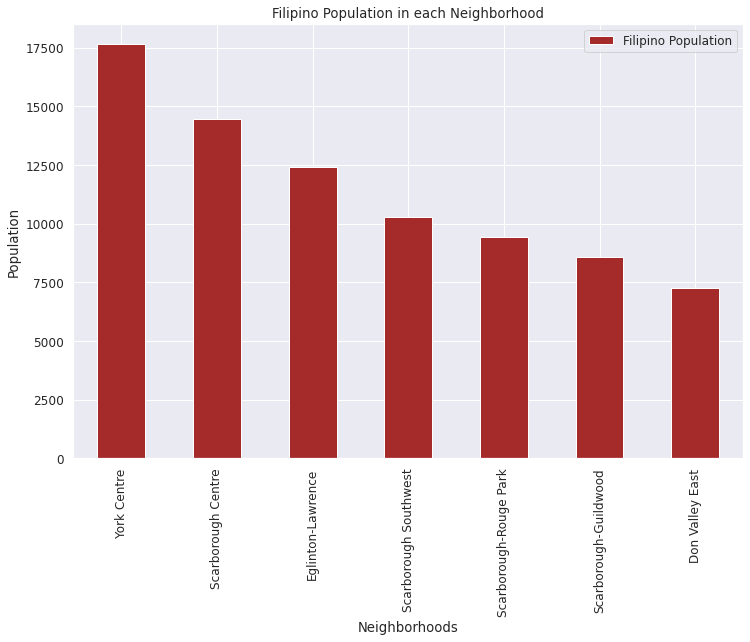

In [46]:
bar_graph = pop_filipino_DF_with_percent.sort_values(by='Filipino Population', ascending=False)
bar_graph.plot(kind='bar',x='Riding', y='Filipino Population',figsize=(12,8), color='brown')
plt.title("Filipino Population in each Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Population")
plt.show()

This analysis & visualization of the relationship between neighborhoods & Filipino population present in those neighborhoods helps us in identifying the highly populated Filipino neighborhoods.<br>
Once we identify those neighborhoods it helps us in deciding where to place the new Filipino restaurant. Filipino restaurant placed in an densely populated Filipino neighborhood is more likely<br>
to get more Filipino customers than a restaurant placed in a neighborhood with less or no Filipino population. Thus this analysis helps in the determining the success of the new Filipino restaurant.

### 3.5 Relationship between Filipino population and Filipino Restaurant ###
Since there is only 1 Filipino Restaurant accross Toronto, in which located in Downtown Toronto, there is no special realtionship between Filipino population and Filipino Restaurant.<br>
By looking to the top 8 ethnic population distribution in Toronto as well, we can see that Downtown Toronto is not a part of it. Therefore, we can justify to the stakeholder<br>
that if they want to open up a Filipino restaurant, they can open up in the York Centre since it has a lot of Filipino Immigrant and being placed in the Top 1 Neigborhood<br>
for filipino population distribution.

### But ####
To continue the process, I've made several research regarding to Filipino people and their food:
<ul>
    <li> Filipino cuisine is influenced principally by China, Spain and Portuguese </li>
    <li> Chinese food became a staple of the pansiterias, with the food given spanish name </li>
    <li> There is one Filipino Fast food Chain that is really famous around the world, Jolibee </li>
    </ul>
    
What I'm going to do, is to change my direction a bit, instead of open up a Filipino restaurant, I'm going forward with open up Filipino Fast Food Chain. Since its in more popular categories<br>
hence, it will obviously attract the investor / business owner's interest.
    
    
#### Therefore, I'm going to Re-Analyse the relationship between neighborhood and Filipino Fast-Food Chain and their relation with Filipino People ####

<hr>

### 3.2 Relationship between neighbourhood and Filipino Restaurant ###
First we will extract the Neighborhood and Chinese Restaurant column from the above toronto dataframe for further analysis:

In [47]:
toronto_f_part = toronto_grouped[['Neighborhood', 'Fast Food Restaurant']]
toronto_f_part

,Neighborhood,Fast Food Restaurant
0,Agincourt,0.0
1,"Alderwood, Long Branch",0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0
3,Bayview Village,0.0
4,"Bedford Park, Lawrence Manor East",0.0
...,...,...
91,"Willowdale, Willowdale West",0.0
92,Woburn,0.0
93,Woodbine Heights,0.0
94,York Mills West,0.0


In [48]:
toronto_f_merged = pd.merge(toronto_DF, toronto_f_part, on='Neighborhood')
toronto_f_merged

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Fast Food Restaurant
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,0.000000
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,0.000000
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,0.055556
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,0.000000
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,0.000000
...,...,...,...,...,...,...
95,York,M6C,Humewood-Cedarvale,43.693781,-79.428191,0.000000
96,York,M6E,Caledonia-Fairbanks,43.689026,-79.453512,0.000000
97,York,M6M,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013,0.000000
98,York,M6N,"Runnymede, The Junction North",43.673185,-79.487262,0.000000


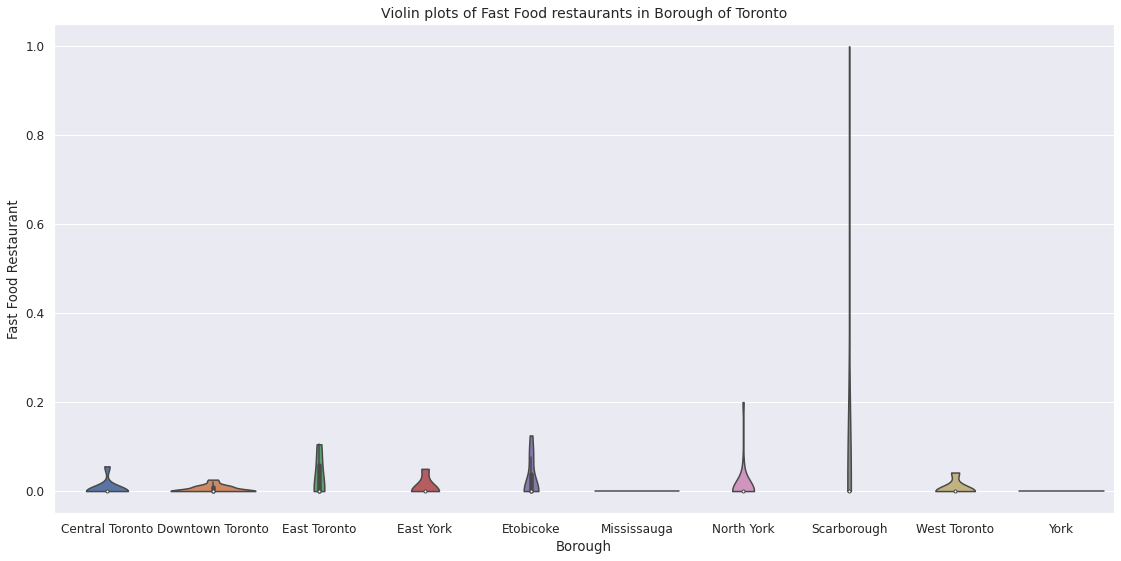

In [49]:
# Let's try Categorical plot 

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(19,9))

sns.set(font_scale=1.1)
sns.violinplot(y="Fast Food Restaurant", x="Borough", data=toronto_f_merged, cut=0);

plt.title('Violin plots of Fast Food restaurants in Borough of Toronto', fontsize=14)
plt.show()

This plot helps in identifying the boroughs with densely populated Fast Food restaurants.

Lets visualize the neighborhood with Fast Food Restaurants

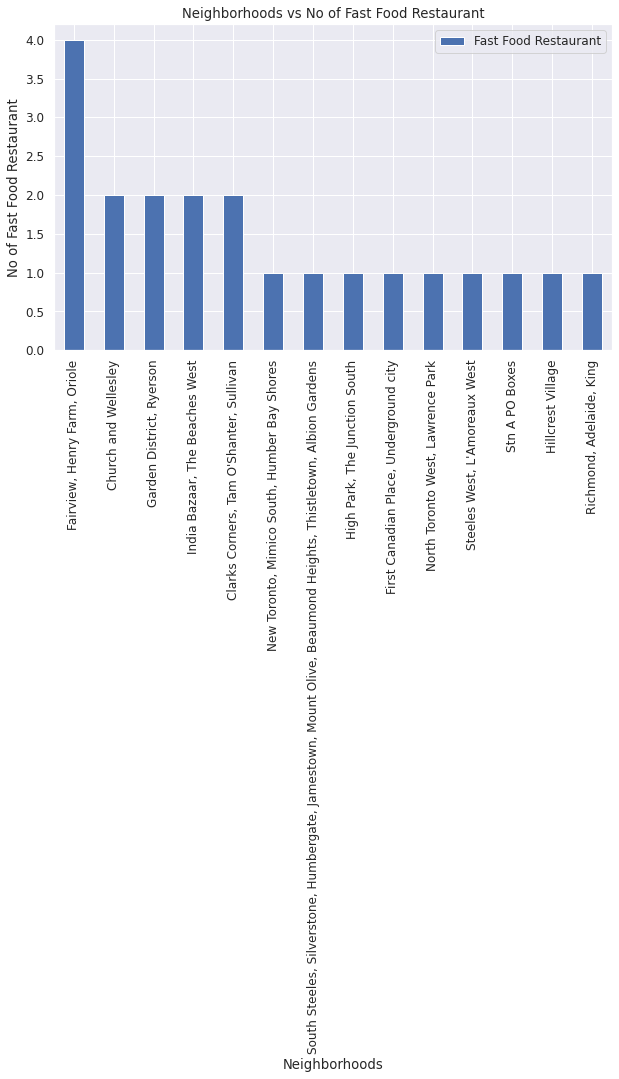

In [50]:
graph = pd.DataFrame(toronto_onehot.groupby('Neighborhood')['Fast Food Restaurant'].sum())
graph = graph.sort_values(by ='Fast Food Restaurant', ascending=False)
graph.iloc[:14].plot(kind='bar', figsize=(10,6))
plt.xlabel("Neighborhoods")
plt.ylabel("No of Fast Food Restaurant")
plt.title("Neighborhoods vs No of Fast Food Restaurant")
plt.show()

### 3.3 Relationship between neighborhood and Filipino popultion ###

In [51]:
#Merge all the population table with the ethnic percentage by neighborhood

ET = ETY_population_df.append(TEY_population_df,sort=True).reset_index()
ET.drop('index',axis=1,inplace=True)
SN = North_population_df.append(Scar_population_df,sort=True).reset_index()
SN.drop('index',axis=1,inplace=True)
pop_ethnic_df = SN.append(ET,sort=True).reset_index()
pop_ethnic_df.drop('index',axis=1,inplace=True)
pop_ethnic_df = pop_ethnic_df[['Riding', 'Population','Ethnic Origin #1', 'Ethnic Origin 1 in %','Ethnic Origin #2', 'Ethnic Origin 2 in %',
                               'Ethnic Origin #3','Ethnic Origin 3 in %','Ethnic Origin #4', 'Ethnic Origin 4 in %','Ethnic Origin #5','Ethnic Origin 5 in %', 
                               'Ethnic Origin #6','Ethnic Origin 6 in %','Ethnic Origin #7', 'Ethnic Origin 7 in %','Ethnic Origin #8', 'Ethnic Origin 8 in %',
                              ]]
pop_ethnic_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.50,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.00,Filipino,7.8,NaN,NaN
7,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.00,NaN,NaN,NaN,NaN
8,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.20,Chinese,7.2,NaN,NaN
9,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#Filtering the riding with Indian ethnic crowd
temp = pop_ethnic_df.loc[(pop_ethnic_df['Ethnic Origin #1'] == 'Filipino')| 
                                      (pop_ethnic_df['Ethnic Origin #2'] == 'Filipino')|
                                      (pop_ethnic_df['Ethnic Origin #3'] == 'Filipino')|
                                      (pop_ethnic_df['Ethnic Origin #4'] == 'Filipino')|
                                      (pop_ethnic_df['Ethnic Origin #5'] == 'Filipino')|
                                      (pop_ethnic_df['Ethnic Origin #6'] == 'Filipino')|
                                      (pop_ethnic_df['Ethnic Origin #7'] == 'Filipino')|
                                      (pop_ethnic_df['Ethnic Origin #8'] == 'Filipino')]
pop_filipino2_df = pd.DataFrame(temp).reset_index()
pop_filipino2_df.drop('index',axis=1,inplace=True)

pop_filipino2_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
1,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN
3,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
4,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
5,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
6,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN


In [54]:
#retaining only Filipino ethnic percentage & the neighborhood name 

columns_list = pop_filipino2_df.columns.to_list()
pop_filipino2_DF_with_percent = pd.DataFrame()
#removing Riding & Population from the column names list
del columns_list[0]
del columns_list[0]


for i in range(0,pop_filipino2_df.shape[0]):
    for j in columns_list:
        print(j)
        if pop_filipino2_df.at[i, j] == 'Filipino':
            k = columns_list.index(j) + 1
            percent_col = columns_list[k]
            pop_filipino2_DF_with_percent = pop_filipino2_DF_with_percent.append({'Riding':pop_filipino2_df.at[i, 'Riding'], 'Population':pop_filipino2_df.at[i, 'Population']
                                                                           , 'Ethnicity': pop_filipino2_df.at[i, j], 'Percentage': pop_filipino2_df.at[i, percent_col]},ignore_index=True)

pop_filipino2_DF_with_percent

Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origin #3
Ethnic Origin 3 in %
Ethnic Origin #4
Ethnic Origin 4 in %
Ethnic Origin #5
Ethnic Origin 5 in %
Ethnic Origin #6
Ethnic Origin 6 in %
Ethnic Origin #7
Ethnic Origin 7 in %
Ethnic Origin #8
Ethnic Origin 8 in %
Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origin #3
Ethnic Origin 3 in %
Ethnic Origin #4
Ethnic Origin 4 in %
Ethnic Origin #5
Ethnic Origin 5 in %
Ethnic Origin #6
Ethnic Origin 6 in %
Ethnic Origin #7
Ethnic Origin 7 in %
Ethnic Origin #8
Ethnic Origin 8 in %
Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origin #3
Ethnic Origin 3 in %
Ethnic Origin #4
Ethnic Origin 4 in %
Ethnic Origin #5
Ethnic Origin 5 in %
Ethnic Origin #6
Ethnic Origin 6 in %
Ethnic Origin #7
Ethnic Origin 7 in %
Ethnic Origin #8
Ethnic Origin 8 in %
Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origi

,Ethnicity,Percentage,Population,Riding
0,Filipino,11.0,112925.0,Eglinton-Lawrence
1,Filipino,17.0,103760.0,York Centre
2,Filipino,7.8,93170.0,Don Valley East
3,Filipino,13.1,110450.0,Scarborough Centre
4,Filipino,9.5,108295.0,Scarborough Southwest
5,Filipino,9.3,101445.0,Scarborough-Rouge Park
6,Filipino,8.5,101115.0,Scarborough-Guildwood


In [55]:
pop_filipino2_DF_with_percent['Filipino Population'] = (pop_filipino2_DF_with_percent['Percentage'] * pop_filipino2_DF_with_percent['Population'])/100
pop_filipino2_DF_with_percent.drop(columns={'Percentage','Population','Ethnicity'},axis=1, inplace =True)
pop_filipino2_DF_with_percent.drop_duplicates(keep='first',inplace=True) 
pop_filipino2_DF_with_percent

,Riding,Filipino Population
0,Eglinton-Lawrence,12421.750
1,York Centre,17639.200
2,Don Valley East,7267.260
3,Scarborough Centre,14468.950
4,Scarborough Southwest,10288.025
5,Scarborough-Rouge Park,9434.385
6,Scarborough-Guildwood,8594.775


###  Quick notes ###
Since I'm going to use the Riding column from the dataframe above to obtain the list of neighborhood, I did a quick search on Wikipedia regarding to the Riding data to prevent future error. It shows that the Eglinton-Lawrence from row 0 (zero) didn't have a comprehensive wikipedia page due to the lack of Geography section. therefore, I'm going to drop the row before hand.

In [56]:
pop_filipino2_DF_with_percent.drop([0], inplace=True)

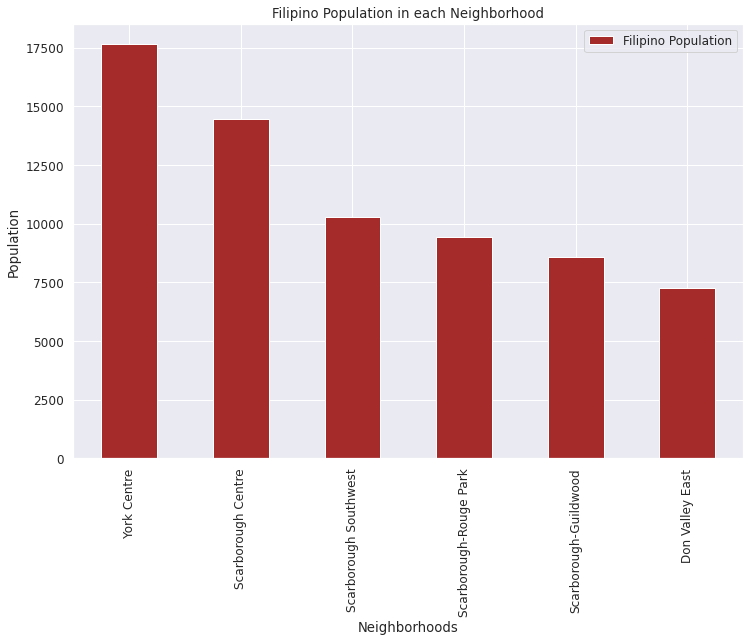

In [57]:
bar_graph = pop_filipino2_DF_with_percent.sort_values(by='Filipino Population', ascending=False)
bar_graph.plot(kind='bar',x='Riding', y='Filipino Population',figsize=(12,8), color='brown')
plt.title("Filipino Population in each Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Population")
plt.show()

This analysis & visualization of the relationship between neighborhoods & Filipino population present in those neighborhoods helps us in identifying the highly populated Filipino neighborhoods. Once we identify those neighborhoods it helps us in deciding where to place the new Filipino Fast Food restaurant. Filipino Fast Food restaurant placed in an densely populated Filipino neighborhood is more likely to get more Filipino customers than a restaurant placed in a neighborhood with less or no Filipino population. Thus this analysis helps in the determining the success of the new Filipino restaurant.

### 3.4 Relationship between Indian poplation and Indian restaurant ###
First get the list of neighborhoods present in the riding using the wikipedia geography section for each riding. Altering the riding names to match the wikipedia page so we can retrieve the neighborhoods present in those ridings.

In [58]:
#Altering the list to match the wikipedia page so we can retrieve the neighborhoods present in those Ridings

riding_list = pop_filipino2_DF_with_percent['Riding'].to_list()
riding_list[riding_list.index('Scarborough Centre')] = 'Scarborough Centre (electoral district)'
riding_list

['York Centre',
 'Don Valley East',
 'Scarborough Centre (electoral district)',
 'Scarborough Southwest',
 'Scarborough-Rouge Park',
 'Scarborough-Guildwood']

In [59]:
#Scraping wiki page to get the neighborhoods of each Ridings

import wikipedia

Riding_neighborhood_df = pd.DataFrame()

for item in riding_list:
    section = wikipedia.WikipediaPage(item).section('Geography')
    start = section.index('neighbourhoods of') + 17
    stop = section.index('.',start)
    Riding_neighborhood_df = Riding_neighborhood_df.append({'Riding':item, 'Neighborhoods':section[start:stop]},ignore_index=True)
    

Riding_neighborhood_df = Riding_neighborhood_df[['Riding','Neighborhoods']]
Riding_neighborhood_df

,Riding,Neighborhoods
0,York Centre,"Westminster–Branson, Bathurst Manor, Wilson H..."
1,Don Valley East,"Flemingdon Park, Don Mills, Graydon Hall, Par..."
2,Scarborough Centre (electoral district),Scarborough City Centre (west of McCowan Road...
3,Scarborough Southwest,"Birch Cliff, Oakridge, Cliffside, Kennedy Par..."
4,Scarborough-Rouge Park,"Morningside Heights, Rouge, Port Union, West ..."
5,Scarborough-Guildwood,"Guildwood, West Hill (west of Morningside Ave..."


In [60]:
#Merging the pop_filipino2_DF_with_percent dataframe containing population information with the Riding_neighborhood_df dataframe.

Neigh_pop = pd.merge(pop_filipino2_DF_with_percent, Riding_neighborhood_df, on='Riding')

Neigh_pop.drop(columns=['Riding'],inplace =True)
Neigh_pop

,Filipino Population,Neighborhoods
0,17639.200,"Westminster–Branson, Bathurst Manor, Wilson H..."
1,7267.260,"Flemingdon Park, Don Mills, Graydon Hall, Par..."
2,10288.025,"Birch Cliff, Oakridge, Cliffside, Kennedy Par..."
3,9434.385,"Morningside Heights, Rouge, Port Union, West ..."
4,8594.775,"Guildwood, West Hill (west of Morningside Ave..."


In [61]:
Neigh_pop['split_neighborhoods'] = Neigh_pop['Neighborhoods'].str.split(',') 
Neigh_pop.drop(columns=['Neighborhoods'],inplace=True,axis=1)
Neigh_pop = Neigh_pop.split_neighborhoods.apply(pd.Series).merge(Neigh_pop, left_index = True, right_index = True).drop(["split_neighborhoods"], axis = 1)\
                    .melt(id_vars = ['Filipino Population'], value_name = "Neighborhood").drop("variable", axis = 1).dropna()

Neigh_pop.reset_index()
Neigh_pop

,Filipino Population,Neighborhood
0,17639.200,Westminster–Branson
1,7267.260,Flemingdon Park
2,10288.025,Birch Cliff
3,9434.385,Morningside Heights
4,8594.775,Guildwood
5,17639.200,Bathurst Manor
6,7267.260,Don Mills
7,10288.025,Oakridge
8,9434.385,Rouge
9,8594.775,West Hill (west of Morningside Avenue)


In [62]:
toronto_f_part['split_neighborhoods'] = toronto_f_part['Neighborhood'].str.split(',') 
toronto_f_part.drop(columns=['Neighborhood'],inplace=True,axis=1)
toronto_f_part = toronto_f_part.split_neighborhoods.apply(pd.Series).merge(toronto_f_part, left_index = True, right_index = True).drop(["split_neighborhoods"], axis = 1)\
                    .melt(id_vars = ['Fast Food Restaurant'], value_name = "Neighborhood").drop("variable", axis = 1).dropna()

toronto_f_part.reset_index()
toronto_f_part

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Fast Food Restaurant,Neighborhood
0,0.000,Agincourt
1,0.000,Alderwood
2,0.000,Bathurst Manor
3,0.000,Bayview Village
4,0.000,Bedford Park
...,...,...
585,0.000,Island airport
634,0.000,Royal York South East
647,0.125,Thistletown
730,0.000,Kingsway Park South East


In [63]:
pop_merged_restaurant_percent = pd.merge(Neigh_pop, toronto_f_part, on='Neighborhood')
pop_merged_restaurant_percent.head()

,Filipino Population,Neighborhood,Fast Food Restaurant
0,10288.025,Oakridge,0.0
1,9434.385,Rouge,1.0
2,17639.200,Wilson Heights,0.0
3,9434.385,Port Union,0.0
4,8594.775,Morningside,0.0


After performing the data cleaning & data analysis we can identify that their is one big relationship established in terms of the Filipino population & the popular Fast Food restaurants.

Thus this marks end of the data cleaning & analyses step in this project. Next we will look into the predictive modeling. In the predictive modelling we are going to use Clustering techniques since this is analysis of unlabelled data. K-Means clustering is used to perform the analysis of the data at hand.

## Predictive Modeling ##

### 4.1 Clustering Neighborhood of Toronto ###
First step in K-means clustering is to identify best K value meaning the number of clusters in a given dataset. To do so we are going to use the elbow method on the Toronto dataset with Fast Food restaurant percentage (i.e. toronto_merged dataframe).

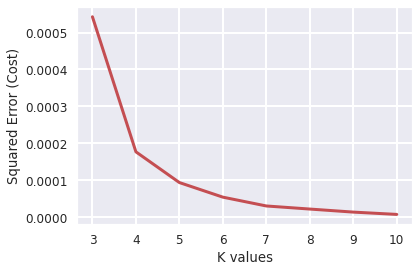

In [64]:
from sklearn.cluster import KMeans

toronto_f_part_clustering = toronto_f_part.drop('Neighborhood', 1)


error_cost = []

for i in range(3,11):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(toronto_f_part_clustering)
    except ValueError:
        print("error on line",i)
    
    
    
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(3,11), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

In [65]:
#Install Yellowbrick, Yellowbrick is a suite of visual analysis and diagnostic tools designed to facilitate machine learning with scikit-learn.

!pip install yellowbrick

from yellowbrick.cluster import KElbowVisualizer

     |████████████████████████████████| 271 kB 15.8 MB/s eta 0:00:01


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


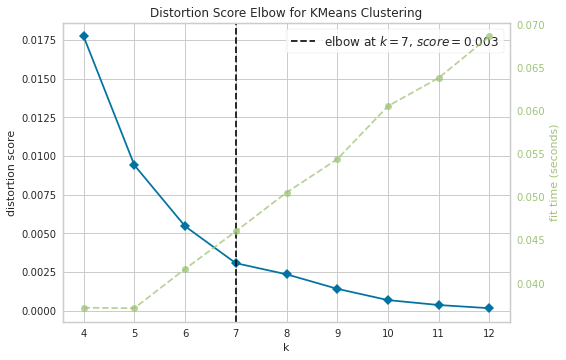

In [66]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,13))

# Fit the data to the visualizer
visualizer.fit(toronto_f_part_clustering)

# Finalize and render the figure
visualizer.show()

After analysing using elbow method using distortion score & Squared error for each K value, looks like K = 7 is the best value.

### 4.1 Clustering the Toronto Neighborhood Using K-Means with K = 7 ###

In [67]:
kclusters = 7

toronto_f_part_clustering = toronto_f_part.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_f_part_clustering)

kmeans.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 0, 5, 4, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 0, 4, 0, 4, 4, 4, 4, 3, 5, 4, 4, 4, 2, 4, 4,
       4, 4, 4, 4, 4, 1, 4, 6, 4, 6, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4,
       4, 4, 4, 4, 4, 2, 4, 4, 6, 0, 4, 4, 4, 4, 4, 4, 3, 0, 4, 4, 4, 4,
       4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 5, 4, 0, 4, 4, 4, 4,
       4, 3, 0, 4, 0, 4, 4, 4, 3, 4, 2, 4, 4, 4, 4, 4, 1, 4, 6, 4, 6, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 2, 4, 6, 4, 4, 4, 4, 0, 4, 4,
       4, 0, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 6, 6,
       4, 4, 0, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 2, 4, 4, 4, 6, 4, 2,
       4, 4, 4, 4, 2, 4, 4, 2, 4, 2], dtype=int32)

In [68]:
#sorted_neighborhoods_venues.drop(['Cluster Labels'],axis=1,inplace=True)
toronto_f_part.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_f_merged = toronto_DF

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_f_merged = toronto_merged.join(toronto_f_part.set_index('Neighborhood'), on='Neighborhood')
toronto_f_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
toronto_f_merged.reset_index(drop=True, inplace=True)
toronto_f_merged['Cluster Labels'].astype(int)
toronto_f_merged.head()

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Filipino Restaurant,Cluster Labels,Fast Food Restaurant
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,0.0,4.0,0.0
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,0.0,4.0,0.0
2,Central Toronto,M4S,Davisville,43.704324,-79.388790,0.0,4.0,0.0
3,Central Toronto,M5N,Roselawn,43.711695,-79.416936,0.0,4.0,0.0
4,Downtown Toronto,M4W,Rosedale,43.679563,-79.377529,0.0,4.0,0.0


### Quick Notes ###
Since I'm analysing two datasets, one with Filipino Restaurant that turns out only happens to have 1 restaurant and don't have any correlation between the restaurant and the neighborhood, and the other one is with Fast Food Restaurant, in which have a correlation between teh neighborhood and the restaurant itself.

Due to I'm using the same definition for both dataframe <i>(toroto_DF)</i>, the filipino restaurant data analysis result is being place in with the Fast Food Restaurant as well. Therefore. I need to drop the column for simplified my clustering process.

In [69]:
toronto_f_merged.drop(columns={'Filipino Restaurant'},axis=1, inplace =True)

In [70]:
toronto_f_merged

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,Fast Food Restaurant
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,4.0,0.000000
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,4.0,0.000000
2,Central Toronto,M4S,Davisville,43.704324,-79.388790,4.0,0.000000
3,Central Toronto,M5N,Roselawn,43.711695,-79.416936,4.0,0.000000
4,Downtown Toronto,M4W,Rosedale,43.679563,-79.377529,4.0,0.000000
5,Downtown Toronto,M4Y,Church and Wellesley,43.665860,-79.383160,0.0,0.025641
6,Downtown Toronto,M5C,St. James Town,43.651494,-79.375418,4.0,0.000000
7,Downtown Toronto,M5C,St. James Town,43.651494,-79.375418,4.0,0.000000
8,Downtown Toronto,M5E,Berczy Park,43.644771,-79.373306,4.0,0.000000
9,Downtown Toronto,M5G,Central Bay Street,43.657952,-79.387383,4.0,0.000000


In [71]:
toronto_f_merged['Borough'].unique()

array(['Central Toronto', 'Downtown Toronto', 'East Toronto', 'East York',
       'Etobicoke', 'Mississauga', 'North York', 'Scarborough', 'York'],
      dtype=object)

Let us see the clusters visually on the map with the help of Folium.

In [72]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, width='90%', height='70%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_f_merged['Latitude'], toronto_f_merged['Longitude'], toronto_f_merged['Neighborhood'], toronto_f_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

### 4.2 Examining The Cluster ###
We have total of 7 clusters such as 0, 1, 2, 3, 4, 5, 6. Let us examine one after the other.

<br>
<br>

<b>Cluster 0</b> contains the neighborhoods which is sparsely populated with Fast Food Restaurants. It is shown in red color in the map.

In [78]:
#Cluster 0
toronto_f_merged.loc[toronto_f_merged['Cluster Labels'] == 0]

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,Fast Food Restaurant
5,Downtown Toronto,M4Y,Church and Wellesley,43.665860,-79.383160,0.0,0.025641
10,Downtown Toronto,M5W,Stn A PO Boxes,43.646435,-79.374846,0.0,0.010309


<br>
<br>

<b>Cluster 1</b> has no rows meaning no data points or neighborhood was near to this centroid.

In [85]:
#Cluster 1
toronto_f_merged.loc[toronto_f_merged['Cluster Labels'] == 1]

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,Fast Food Restaurant


<br>
<br>

<b>Cluster 2</b> has no rows meaning no data points or neighborhood was near to this centroid.

In [80]:
#Cluster 2
toronto_f_merged.loc[toronto_f_merged['Cluster Labels'] == 2]

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,Fast Food Restaurant


<br>
<br>

<b>Cluster 3</b>  contains the neighborhoods which is sparsely populated with Fast Food Restaurants. It is shown in blue color in the map.

In [81]:
#Cluster 3
toronto_f_merged.loc[toronto_f_merged['Cluster Labels'] == 3]

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,Fast Food Restaurant
16,East York,M4H,Thorncliffe Park,43.705369,-79.349372,3.0,0.05


<br>
<br>

<b>Cluster 4</b> contains all the neighborhoods which has least number of Fast Food restaurants. It is shown in green color in the map

In [82]:
#Cluster 4
toronto_f_merged.loc[toronto_f_merged['Cluster Labels'] == 4]

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,Fast Food Restaurant
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,4.0,0.0
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,4.0,0.0
2,Central Toronto,M4S,Davisville,43.704324,-79.388790,4.0,0.0
3,Central Toronto,M5N,Roselawn,43.711695,-79.416936,4.0,0.0
4,Downtown Toronto,M4W,Rosedale,43.679563,-79.377529,4.0,0.0
6,Downtown Toronto,M5C,St. James Town,43.651494,-79.375418,4.0,0.0
7,Downtown Toronto,M5C,St. James Town,43.651494,-79.375418,4.0,0.0
8,Downtown Toronto,M5E,Berczy Park,43.644771,-79.373306,4.0,0.0
9,Downtown Toronto,M5G,Central Bay Street,43.657952,-79.387383,4.0,0.0
11,Downtown Toronto,M6G,Christie,43.669542,-79.422564,4.0,0.0


<b>Cluster 5</b> contains all the neighborhoods which is densely populated with Fast Food restaurants. It is shown in Olive color in the map

In [83]:
#Cluster 5
toronto_f_merged.loc[toronto_f_merged['Cluster Labels'] == 5]

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,Fast Food Restaurant
19,North York,M2H,Hillcrest Village,43.803762,-79.363452,5.0,0.2


<b>Cluster 6</b> has no rows meaning no data points or neighborhood was near to this centroid.

In [84]:
#Cluster 6
toronto_f_merged.loc[toronto_f_merged['Cluster Labels'] == 6]

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,Fast Food Restaurant


<br>
<br>

## 5. Results and Discussion ##

### 5.1 Results ###
We have reached the end of the analysis, in the result section we can document all the findinds from above clustering & visualization of the datas. In this project, as the business problem started with identifying a good neighborhood to open a new Filipino Restaurant, which later in this analysis we understand that there is only 1 Filipino Restaurant so that business can be place anywhere near the densed populated Filipino Neighbour. 
<br>

But to make it more interesting, I change the direction of my analysis and search for more popular categories to implement Fiipino Restaurant but also minding the business requirement from business owners. So then I looked into Fast Food Restaurant since Phillipines is also known for their famous Filipino Fast Food Restaurant Chain, <i>Jolibee</i>.
<br>

We looked into all the neighborhoods in Toronto, analysed the Filipino population in each neighborhood & spread of Fast Food Restaurants in those neighborhoods to come to conclusion about which neighborhood would be a better spot for opening a new Filipino Fast Food Restaurant. I have used data from web resources like Wikipedia, geospatial coordinates of Toronto neighborhoods, and Foursquare API, to set up a very realistic data-analysis scenario. We have found out that —

<ul>
    <li> In those 11 boroughs we identified that only Central Toronto, Downtown Toronto, East Toronto, East York, Etobicoke, West Toronto and North York boroughs have medium amount of Fast Food Restaurants
        while Scarborough have high amount of Fast Food Restaurant with the help of Violin plots between Number of Fast Food Restaurants in Borough of Toronto.</li>
    <br>
    <li> In all the ridings, Eglinton Lawrence, York Center, Don Valley East, Scarborough Centre, Scarborough Southwest, Scarborough-Guildwood, and Scarborough-Rouge Park are the densely populated with
        Filipino crowd ridings.</li>
    <br>
    <li> With the help of clusters examing and violin plots looks like Scarborough are already densely populated with Fast Food restaurants. While Central Toronto, Downtown Toronto, East Toronto,
        East York, Etobicoke, West Toronto and North York are of medium-density. So it is better idea to leave those boroughs out and consider only Mississauga and
        York for the new restaurant's location.</li>
    <br>
    <li> After careful consideration it is a good idea to open a new Filipino Fast Food Restaurant in York borough since it has high number of Filipino population which gives a higher number of customers
        possibility and lower competition since there are very less Fast Food restaurants in the neighborhoods.</li>
    </ul>
    
    
### 5.2 Discussion ###
According to this analysis, York borough will provide least competitor for the new Filipino Fast Food Restaurant as there is less to no Fast Food Restaurant in the area. Also looking at the population distribution, it shows that the area itself are densely populated by Filipino crowd which helps the new restaurant to gain a fast return on investment by having large customer base. This region will definitely be a perfect place to open up a Filipino Fast Food Restaurant. Some of the drawbacks of this analysis are:
<ul>
    <li> The clustering is completely based only on data obtained from Foursquare API.</li>
    <li> The Filipino population distribution in each neighborhood that was scraped from Wikipedia is also based on the 2016 census which is not up-to date. Thus population distribution would
        have definitely changed by 2021 given 5 years gap in the data.</li>
    <li> Since population distribution of Filipino crowd in each neighborhood and number of Filipino restaurants are the major feature in this analysis and it is not fully up-to date data, this analysis is
        definitely not far from being conclusory and it has lot of areas where it can be imporved. </li>
    <li> Nevertheless, it certainly provides us with some good insights, preliminary information on possibilites and a head start into this business problem by setting the step stones properly. </li>
    <li> Lastly, there are still a lot of rooms for improvement and the output of the analysis will potentially be vary depending on the type of clustering techniques that we use to examine the data. </li>
    </ul>
    
    
## 6. Conclusion ##
To conclude this project, we've learned how to get work done as a data scientist. We used a lot of python libraries to fetch the data , to manipulate the contents and to analyze as well as visualize those datasets. We've made a good use of Foursquare API to explore the venues in the neighborhood of Toronto, then scrape and clean the data we've gathered from Wikipedia with the help of Wikipedia Python Library and visualized it using various plot by seaborn and matplotlib. Beside that, we've also implemented Machine Learning technique to predicted the output given by the data and used Folium to generated interactive map. Some of the drawbacks that need to be improve is that this analysis will be more comprehensive if we've more data and applied different machine learning technique. This analysis can further be used for any scenario that match the situation, such as open up new gym, school, and etc.

---